
<h1 id="Линейная-регрессия-и-основные-библиотеки-Python-для-анализа-данных-и-научных-вычислений">Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений<a class="anchor-link" href="#Линейная-регрессия-и-основные-библиотеки-Python-для-анализа-данных-и-научных-вычислений">¶</a></h1>



<p>Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python, необходимыми для дальнейшего прохождения курса.</p>



<p><strong>Материалы</strong></p>
<ul>
<li>Лекции данного курса по линейным моделям и градиентному спуску</li>
<li><a href="http://docs.scipy.org/doc/">Документация</a> по библиотекам NumPy и SciPy</li>
<li><a href="http://matplotlib.org/">Документация</a> по библиотеке Matplotlib </li>
<li><a href="http://pandas.pydata.org/pandas-docs/stable/tutorials.html">Документация</a> по библиотеке Pandas</li>
<li><a href="http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/">Pandas Cheat Sheet</a></li>
<li><a href="http://stanford.edu/~mwaskom/software/seaborn/">Документация</a> по библиотеке Seaborn </li>
</ul>



<h2 id="Задание-1.-Первичный-анализ-данных-c-Pandas">Задание 1. Первичный анализ данных c Pandas<a class="anchor-link" href="#Задание-1.-Первичный-анализ-данных-c-Pandas">¶</a></h2>



<p>В этом заданиии мы будем использовать данные <a href="http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights">SOCR</a> по росту и весу 25 тысяч подростков.</p>



<p><strong>[1].</strong> Если у Вас не установлена библиотека Seaborn - выполните в терминале команду <em>conda install seaborn</em>. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).</p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<p>Считаем данные по росту и весу (<em>weights_heights.csv</em>, приложенный в задании) в объект Pandas DataFrame:</p>


In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')


<p>Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.).</p>
<p>После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом <em>plot</em> Pandas DataFrame с аргументом <em>kind='hist'</em>.</p>
<p><strong>Пример.</strong> Построим гистограмму распределения роста подростков из выборки <em>data</em>. Используем метод <em>plot</em> для DataFrame <em>data</em> c аргументами <em>y='Height'</em> (это тот признак, распределение которого мы строим)</p>


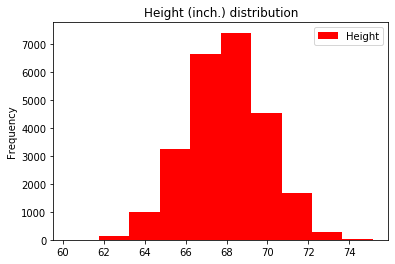

In [4]:
data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution');


<p>Аргументы:</p>
<ul>
<li><em>y='Height'</em> - тот признак, распределение которого мы строим</li>
<li><em>kind='hist'</em> - означает, что строится гистограмма</li>
<li><em>color='red'</em> - цвет</li>
</ul>



<p><strong>[2]</strong>. Посмотрите на первые 5 записей с помощью метода <em>head</em> Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода <em>plot</em> Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.</p>


In [5]:
# Ваш код здесь
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


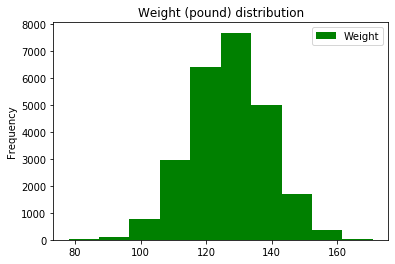

In [6]:
# Ваш код здесь
data.plot(y='Weight', kind='hist', color='green', title="Weight (pound) distribution");


<p>Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (<em>m</em> - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или <em>pairplot</em> библиотеки Seaborn.</p>
<p>Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак <em>Индекс массы тела</em> (<a href="https://en.wikipedia.org/wiki/Body_mass_index">BMI</a>). Для этого воспользуемся удобной связкой метода <em>apply</em> Pandas DataFrame и lambda-функций Python.</p>


In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)


<p><strong>[3].</strong> Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод <em>pairplot</em> библиотеки Seaborn.</p>


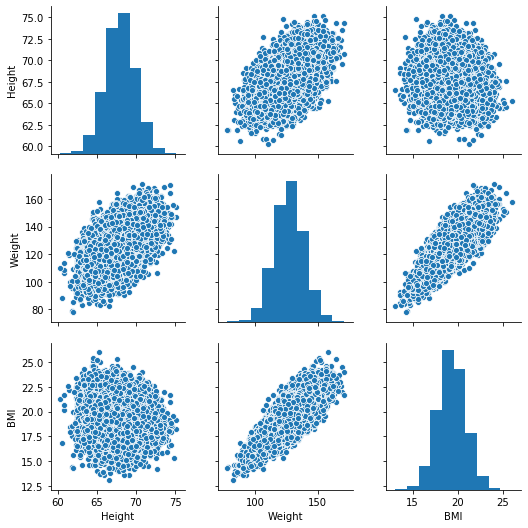

In [9]:
# Ваш код здесь
sns.pairplot(data);


<p>Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других.</p>



<p><strong>[4]</strong>. Создайте в DataFrame <em>data</em> новый признак <em>weight_category</em>, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод <em>boxplot</em> библиотеки Seaborn и метод <em>apply</em> Pandas DataFrame. Подпишите ось <em>y</em> меткой «Рост», ось <em>x</em> – меткой «Весовая категория».</p>


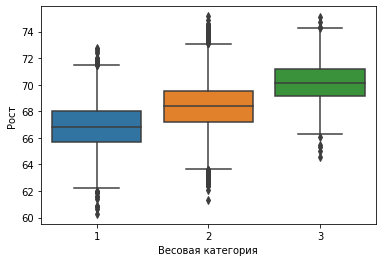

In [10]:
def weight_category(weight):
    # Ваш код здесь
    if weight < 120: return 1
    if weight >= 150: return 3
    return 2

data['weight_cat'] = data['Weight'].apply(weight_category)

# Ваш код здесь
box_plot = sns.boxplot(x=data['weight_cat'], y=data['Height'])
box_plot.set(xlabel="Весовая категория", ylabel="Рост");


<p><strong>[5].</strong> Постройте scatter plot зависимости роста от веса, используя метод <em>plot</em> для Pandas DataFrame с аргументом <em>kind='scatter'</em>. Подпишите картинку.</p>


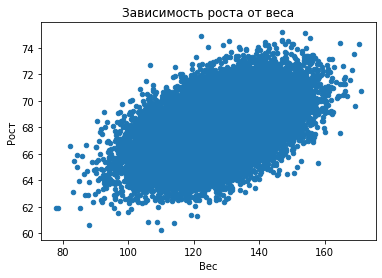

In [11]:
# Ваш код здесь
data_plot = data.plot(y='Height', x='Weight', kind='scatter', title="Зависимость роста от веса");
data_plot.set(ylabel="Рост", xlabel="Вес");


<h2 id="Задание-2.-Минимизация-квадратичной-ошибки">Задание 2. Минимизация квадратичной ошибки<a class="anchor-link" href="#Задание-2.-Минимизация-квадратичной-ошибки">¶</a></h2>



<p>В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.</p>
<p><strong>[6].</strong> Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных.</p>


In [12]:
# Ваш код здесь
def error(w0, w1):
    return sum( (data['Height'] - (w0 + w1 * data['Weight'])) ** 2 )


<p>Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.</p>
<p><strong>[7].</strong> Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод <em>plot</em> из <em>matplotlib.pyplot</em>, а также метод <em>linspace</em> библиотеки NumPy. Подпишите оси и график.</p>


In [13]:
x_values = np.linspace(70, 180, 100)

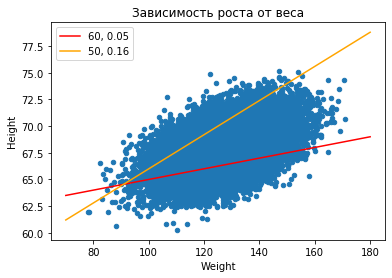

In [14]:
# Ваш код здесь

data.plot(y='Height', x='Weight', kind='scatter', title="Зависимость роста от веса");

weights = [[60, 0.05], [50, 0.16]]

y_values_1 = weights[0][0] + weights[0][1] * x_values
y_values_2 = weights[1][0] + weights[1][1] * x_values

plt.plot(x_values, y_values_1, label="60, 0.05", c='red')
plt.plot(x_values, y_values_2, label="50, 0.16", c='orange')

plt.legend()
plt.show()


<p>Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.</p>
<p><strong>[8].</strong> Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.</p>


In [15]:
w0 = 50

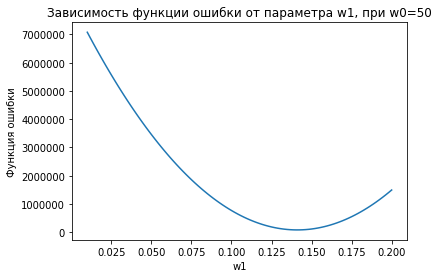

In [16]:
# Ваш код здесь
num_iter = 100

w1 = np.linspace(0.01, 0.20, num_iter) 

error_vals = np.zeros((num_iter))

for i in range(num_iter):
    error_vals[i] = error(w0, w1[i])
    
plt.xlabel("w1")
plt.ylabel("Функция ошибки")
plt.title("Зависимость функции ошибки от параметра w1, при w0=50")
plt.plot(w1, error_vals);


<p>Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.</p>
<p><strong>[9].</strong> С помощью метода <em>minimize_scalar</em> из <em>scipy.optimize</em> найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$.</p>


In [17]:
# Ваш код здесь
from scipy.optimize import minimize_scalar
w_opt = minimize_scalar(lambda w1: error(w0, w1), bounds=(-5, 5))
w_opt

     fun: 79512.21728699486
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728834385

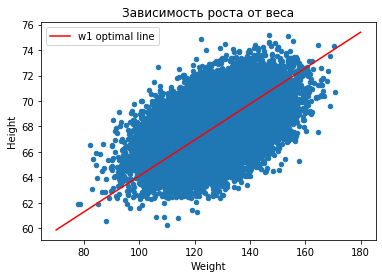

In [18]:
# Ваш код здесь
data.plot(y='Height', x='Weight', kind='scatter', title="Зависимость роста от веса");

optimal_weights = [w0, w_opt.x]

y_values = optimal_weights[0] + optimal_weights[1] * x_values

plt.plot(x_values, y_values, color='red', label="w1 optimal line");
plt.legend();


<p>При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме.</p>
<p>Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.</p>


In [19]:
from mpl_toolkits.mplot3d import Axes3D


<p>Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось).</p>


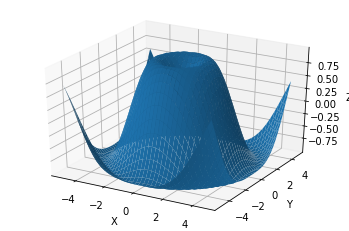

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


<p><strong>[10].</strong> Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».</p>


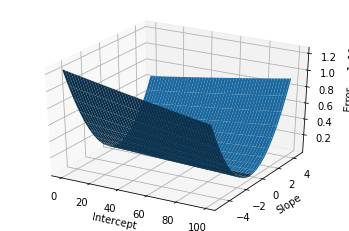

In [21]:
# Ваш код здесь
fig = plt.figure()
ax = fig.gca(projection='3d')

w0 = np.arange(0., 100., 1)
w1 = np.arange(-5., 5., 0.5)

w0, w1 = np.meshgrid(w0, w1)

squared_error_vect = np.vectorize(error)
E = np.array(squared_error_vect(w0.ravel(), w1.ravel()))
E.shape = w0.shape

        
surf = ax.plot_surface(w0, w1, E)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()


<p><strong>[11].</strong> С помощью метода <em>minimize</em> из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.</p>


In [22]:
# Ваш код здесь
from scipy.optimize import minimize

x0 = (0, 0)
bounds = ((-100, 100), (-5, 5))
fun = lambda w: error(w[0], w[1])

min_function = minimize(fun, x0, bounds=bounds, method="L-BFGS-B")
min_function

      fun: 67545.28708529084
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04802132, -0.93132257])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57171454,  0.08200697])

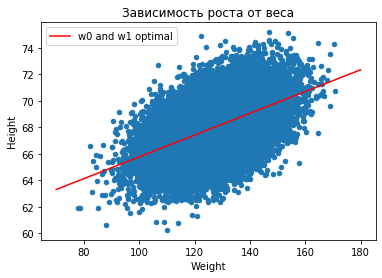

In [23]:
# Ваш код здесь
w0_opt, w1_opt = min_function.x[0], min_function.x[1]

data.plot(y='Height', x='Weight', kind='scatter', title="Зависимость роста от веса");
y_optimal = w0_opt + w1_opt * x_values

plt.plot(x_values, y_optimal, color='red', label="w0 and w1 optimal");
plt.legend();


<h2 id="Критерии-оценки-работы">Критерии оценки работы<a class="anchor-link" href="#Критерии-оценки-работы">¶</a></h2>



<ul>
<li>Выполняется ли тетрадка IPython без ошибок? (15 баллов)</li>
<li>Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)</li>
<li>Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)</li>
<li>Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)</li>
<li>Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)</li>
<li>Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)</li>
<li>Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)</li>
<li>Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)</li>
<li>Правильно ли используется метод minimize_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)</li>
<li>Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)</li>
<li>Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)</li>
</ul>
